In [0]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adamax, Nadam, Adam
import numpy as np
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [0]:
np.random.seed(20)
  
(X_Train, y_Train), (X_Test, y_Test) = mnist.load_data()
  

  X_Train4K = X_Train.reshape(X_Train.shape[0], 28, 28, 1).astype('float32')
X_Test4K = X_Test.reshape(X_Test.shape[0], 28, 28, 1).astype('float32')

In [0]:
X_Train4K_norm = X_Train4K / 255
X_Test4K_norm = X_Test4K /255
  
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

In [0]:
model = Sequential()

#CNN layer 1 & Max Pool layer 1
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
  
#CNN layer 2 & Max Pool layer 2
model.add(Conv2D(filters=36, kernel_size=(5,5), padding='same', input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

#Dropout layer
model.add(Dropout(1))


model.add(Flatten())

#FC layer
model.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.summary()
print("")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 36)          14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 3, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 324)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3250      
Total para

In [0]:
#model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.005), metrics=['accuracy'])
model.compile(loss='mse', optimizer=Adam(lr=0.005), metrics=['accuracy'])

train_fit_history = model.fit(x=X_Train4K_norm, y=y_TrainOneHot, validation_split=0.2, epochs=10, batch_size=300, verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 4s - loss: 0.0136 - acc: 0.9056 - val_loss: 0.0036 - val_acc: 0.9764
Epoch 2/10
 - 1s - loss: 0.0035 - acc: 0.9778 - val_loss: 0.0035 - val_acc: 0.9774
Epoch 3/10
 - 1s - loss: 0.0025 - acc: 0.9842 - val_loss: 0.0024 - val_acc: 0.9839
Epoch 4/10
 - 1s - loss: 0.0019 - acc: 0.9886 - val_loss: 0.0023 - val_acc: 0.9855
Epoch 5/10
 - 1s - loss: 0.0018 - acc: 0.9881 - val_loss: 0.0023 - val_acc: 0.9848
Epoch 6/10
 - 1s - loss: 0.0015 - acc: 0.9906 - val_loss: 0.0020 - val_acc: 0.9871
Epoch 7/10
 - 1s - loss: 0.0013 - acc: 0.9921 - val_loss: 0.0024 - val_acc: 0.9849
Epoch 8/10
 - 1s - loss: 0.0013 - acc: 0.9921 - val_loss: 0.0020 - val_acc: 0.9865
Epoch 9/10
 - 1s - loss: 0.0010 - acc: 0.9937 - val_loss: 0.0020 - val_acc: 0.9870
Epoch 10/10
 - 1s - loss: 0.0010 - acc: 0.9940 - val_loss: 0.0018 - val_acc: 0.9887


In [0]:
score = model.evaluate(X_Train4K, y_TrainOneHot)
print()
print("\t Accuracy of testing data = {:2.1f}%".format(score[1]*100.0))

60000/60000 [==============================] - 3s 44us/step

	 Accuracy of testing data = 99.1%


In [0]:
#print("\t[Info] Show 10 prediction result (From 100):")  

#X = X_Test4K_norm[100:110,:]
#prediction = model.predict_classes(X)
#print(prediction)

## **加大池化數量**

In [0]:
model_1 = Sequential()

#CNN layer 1 & Max Pool layer 1
model_1.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', input_shape=(28,28,1), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(5,5)))
  
#CNN layer 2 & Max Pool layer 2
model_1.add(Conv2D(filters=36, kernel_size=(5,5), padding='same', input_shape=(28,28,1), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(5,5)))

#Dropout layer
model_1.add(Dropout(1))


model_1.add(Flatten())

#FC layer
model_1.add(Dense(10, activation='softmax'))

In [0]:
model_1.summary()
print("")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 5, 5, 36)          14436     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 1, 36)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 1, 36)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 36)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                370       
Total para

In [0]:
model_1.compile(loss='mse', optimizer=Adam(lr=0.005), metrics=['accuracy'])

train_fit_history_1 = model_1.fit(x=X_Train4K_norm, y=y_TrainOneHot, validation_split=0.2, epochs=10, batch_size=300, verbose=2)

score_1 = model_1.evaluate(X_Train4K, y_TrainOneHot)
print()
print("\t Accuracy of testing data = {:2.1f}%".format(score_1[1]*100.0))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 1s - loss: 0.0213 - acc: 0.8473 - val_loss: 0.0060 - val_acc: 0.9618
Epoch 2/10
 - 1s - loss: 0.0051 - acc: 0.9677 - val_loss: 0.0036 - val_acc: 0.9776
Epoch 3/10
 - 1s - loss: 0.0037 - acc: 0.9767 - val_loss: 0.0033 - val_acc: 0.9793
Epoch 4/10
 - 1s - loss: 0.0030 - acc: 0.9809 - val_loss: 0.0032 - val_acc: 0.9790
Epoch 5/10
 - 1s - loss: 0.0026 - acc: 0.9838 - val_loss: 0.0029 - val_acc: 0.9816
Epoch 6/10
 - 1s - loss: 0.0022 - acc: 0.9865 - val_loss: 0.0028 - val_acc: 0.9814
Epoch 7/10
 - 1s - loss: 0.0020 - acc: 0.9879 - val_loss: 0.0025 - val_acc: 0.9841
Epoch 8/10
 - 1s - loss: 0.0018 - acc: 0.9889 - val_loss: 0.0024 - val_acc: 0.9845
Epoch 9/10
 - 1s - loss: 0.0017 - acc: 0.9893 - val_loss: 0.0021 - val_acc: 0.9863
Epoch 10/10
 - 1s - loss: 0.0016 - acc: 0.9897 - val_loss: 0.0025 - val_acc: 0.9842
60000/60000 [==============================] - 2s 41us/step

	 Accuracy of testing data = 97.0%


In [0]:
print("\t[Info] MaxPool = 3x3 and show 10 prediction result (From 100):")  
X = X_Test4K_norm[100:110,:]
prediction = model.predict_classes(X)
print(prediction)


print("\t[Info] MaxPool = 5x5 and show 10 prediction result (From 100):")  
X_1 = X_Test4K_norm[100:110,:]
prediction_1 = model.predict_classes(X_1)
print(prediction_1)

	[Info] MaxPool = 3x3 and show 10 prediction result (From 100):
[6 0 5 4 9 9 2 1 9 4]
	[Info] MaxPool = 5x5 and show 10 prediction result (From 100):
[6 0 5 4 9 9 2 1 9 4]


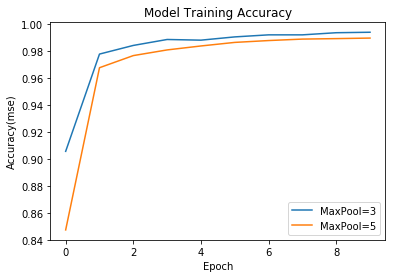

In [0]:
plt.plot(train_fit_history.history["acc"])
plt.plot(train_fit_history_1.history["acc"])


plt.title("Model Training Accuracy")
plt.ylabel("Accuracy(mse)")
plt.xlabel("Epoch")
plt.legend(["MaxPool=3","MaxPool=5"], loc="best")
plt.show()

## **依據訓練結果，加大池化數量也是導致準確度下降的因數之一**